In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
# load dataset
df=pd.read_csv('c:/Users/hp/Downloads/cardio_train.csv/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
# data preprocessing
df.drop(columns=['id'], inplace=True, errors='ignore')


df['age'] = df['age'] // 365
df.columns


# Check for missing values
print(df.isnull().sum())

# Display dataset info
print(df.info())

# Display statistical summary
print(df.describe())


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
None
           age        gender  

C:\Users\hp\AppData\Local\Temp\ipykernel_11188\2534076225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['cardio'], palette=['#2E86C1', '#E74C3C'])


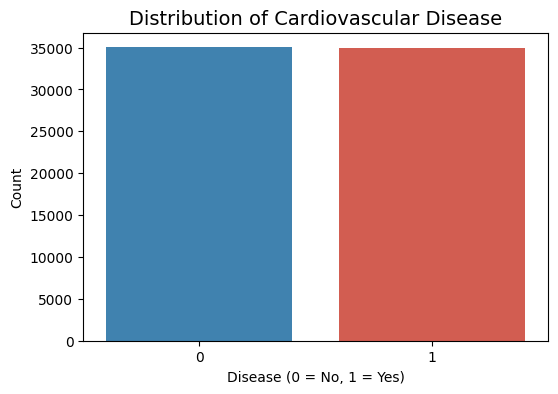

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['cardio'], palette=['#2E86C1', '#E74C3C'])
plt.title("Distribution of Cardiovascular Disease", fontsize=14)
plt.xlabel("Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

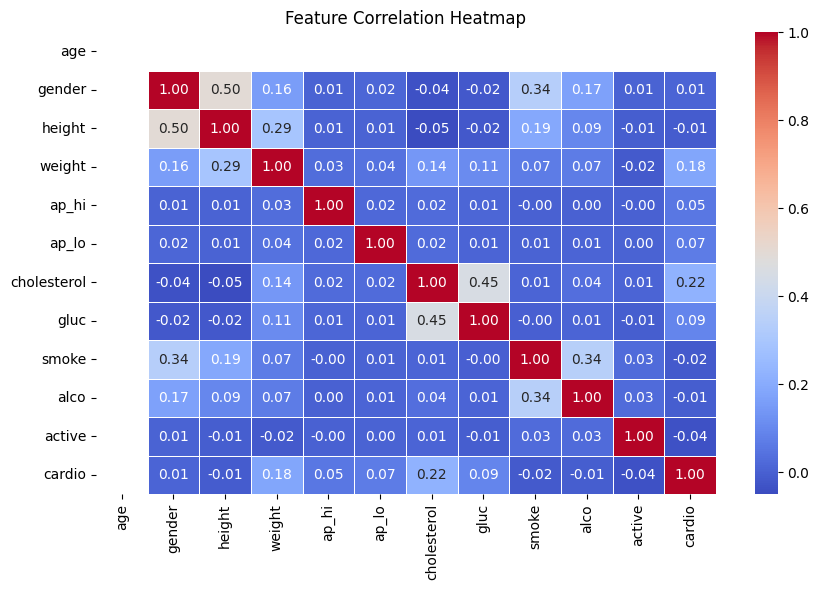

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

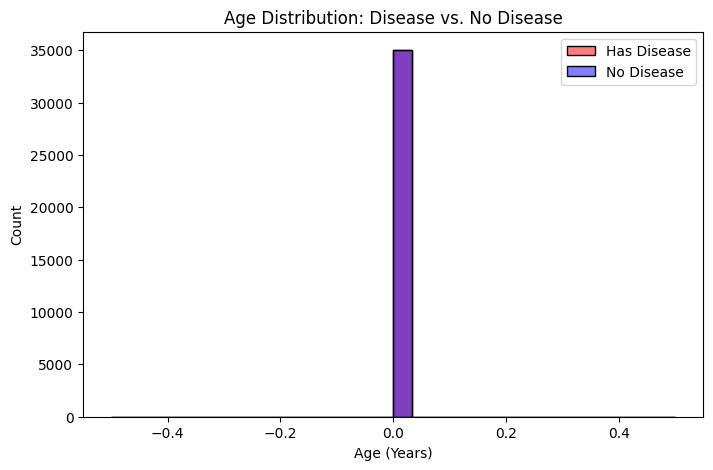

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df['cardio'] == 1]['age'], bins=30, color="red", label="Has Disease", kde=True)
sns.histplot(df[df['cardio'] == 0]['age'], bins=30, color="blue", label="No Disease", kde=True)
plt.title("Age Distribution: Disease vs. No Disease")
plt.xlabel("Age (Years)")
plt.ylabel("Count")
plt.legend()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_11188\2600564701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['cardio'], y=df['ap_hi'], palette=["blue", "red"])


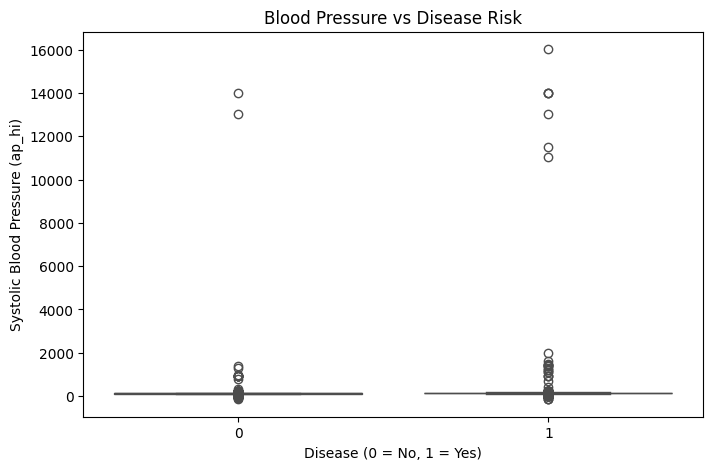

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cardio'], y=df['ap_hi'], palette=["blue", "red"])
plt.title("Blood Pressure vs Disease Risk")
plt.xlabel("Disease (0 = No, 1 = Yes)")
plt.ylabel("Systolic Blood Pressure (ap_hi)")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_11188\543243104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['cardio'], y=df['cholesterol'], palette=["blue", "red"])


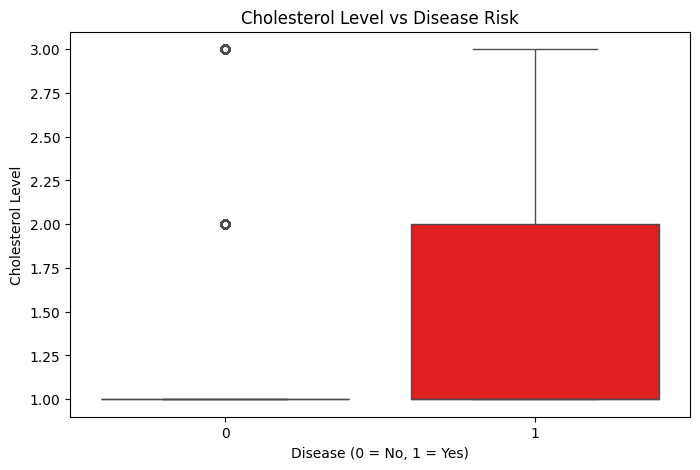

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cardio'], y=df['cholesterol'], palette=["blue", "red"])
plt.title("Cholesterol Level vs Disease Risk")
plt.xlabel("Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.show()


In [22]:
# Selecting relevant features
features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'  # 0 (No Disease) / 1 (Has Disease)

X = df[features]
y = df[target]

# Normalize numerical features
scaler = StandardScaler()
X[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.fit_transform(X[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])


C:\Users\hp\AppData\Local\Temp\ipykernel_11188\1769070219.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scaler.fit_transform(X[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [25]:
# Predictions on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error & R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.2280
R² Score: 0.0880


In [30]:
# for input
age = int(input("Enter Age (years): "))
height = float(input("Enter Height (m): "))
weight = float(input("Enter Weight (kg): "))
ap_hi = int(input("Enter Systolic Blood Pressure: "))
ap_lo = int(input("Enter Diastolic Blood Pressure: "))
cholesterol = int(input("Enter Cholesterol Level (1-Normal, 2-Above Normal, 3-Well Above Normal): "))
glucose = int(input("Enter Glucose Level (1-Normal, 2-Above Normal, 3-Well Above Normal): "))
smoke = int(input("Do you Smoke? (0-No, 1-Yes): "))
alco = int(input("Do you Consume Alcohol? (0-No, 1-Yes): "))
active = int(input("Are you Physically Active? (0-No, 1-Yes): "))

# Store input into an array
new_patient = np.array([[age, height, weight, ap_hi, ap_lo, cholesterol, glucose, smoke, alco, active]])

# Convert it into a DataFrame (for consistency with training data)
feature_names = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
new_patient_df = pd.DataFrame(new_patient, columns=feature_names)

# Scale numerical values (Same scaling as training data)
new_patient_df.iloc[:, :5] = scaler.transform(new_patient_df.iloc[:, :5])

# Predict Disease Risk
predicted_risk = model.predict(new_patient_df)

# Display Output
print(f"\nPredicted Disease Risk Score: {predicted_risk[0]:.2f}")



Predicted Disease Risk Score: 0.45
